In [13]:

import pandas as pd    # For data manipulation
import numpy as np     # For numerical operations
import seaborn as sns  # For visualizations
import matplotlib.pyplot as plt  # For plotting


In [41]:
import pandas as pd 
df= pd.read_csv("synthetic_final.csv")
df.head()


,Task ID,Description,Assigned Person,Start Date,End Date,Status,Notes,Next Step,Task Type,Priority
0,TASK-1,Write test cases for repurpose best-of-breed s...,Audrey Rios,2025-06-04,2025-06-13,In Progress,Stock central stage get year image action fill...,Politics admit house opportunity often throw.,Testing,Low
1,TASK-2,Develop new unleash turn-key ROI,Julie Washington,2025-06-05,2025-06-23,In Progress,Explain stage bag kind which stuff hard.,Cell kitchen trouble light.,Feature Development,Low
2,TASK-3,Refactor module for repurpose leading-edge act...,Angela Moore,2025-07-05,2025-07-22,Pending,Company future single report only.,Under list country response.,Refactoring,Low
3,TASK-4,Respond to customer query on drive robust appl...,Shawn Mccoy,2025-07-04,2025-07-15,Pending,Animal prepare experience particular property ...,Night seek choice owner education.,Client Request,Low
4,TASK-5,Research feasibility of innovate ubiquitous ROI,Scott Long,2025-07-07,2025-07-26,Completed,Like offer interview trade do.,Quickly stage body tend successful.,Research,Low


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Task ID          500 non-null    object
 1   Description      500 non-null    object
 2   Assigned Person  500 non-null    object
 3   Start Date       500 non-null    object
 4   End Date         500 non-null    object
 5   Status           500 non-null    object
 6   Notes            500 non-null    object
 7   Next Step        500 non-null    object
 8   Task Type        500 non-null    object
 9   Priority         500 non-null    object
dtypes: object(10)
memory usage: 39.2+ KB


In [43]:
df.describe()

,Task ID,Description,Assigned Person,Start Date,End Date,Status,Notes,Next Step,Task Type,Priority
count,500,500,500,500,500,500,500,500,500,500
unique,500,500,100,61,74,3,500,500,9,3
top,TASK-1,Write test cases for repurpose best-of-breed s...,Dr. Cynthia Howard DDS,2025-06-11,2025-07-01,In Progress,Stock central stage get year image action fill...,Politics admit house opportunity often throw.,Refactoring,Low
freq,1,1,10,15,14,171,1,1,63,319


In [44]:
df.shape

(500, 10)

In [45]:
num_col=df.select_dtypes(include=['int64','float64']).columns
print(num_col)


Index([], dtype='object')


In [46]:
cat_col=df.select_dtypes(include=['object','category']).columns
print(cat_col)

Index(['Task ID', 'Description', 'Assigned Person', 'Start Date', 'End Date',
       'Status', 'Notes', 'Next Step', 'Task Type', 'Priority'],
      dtype='object')


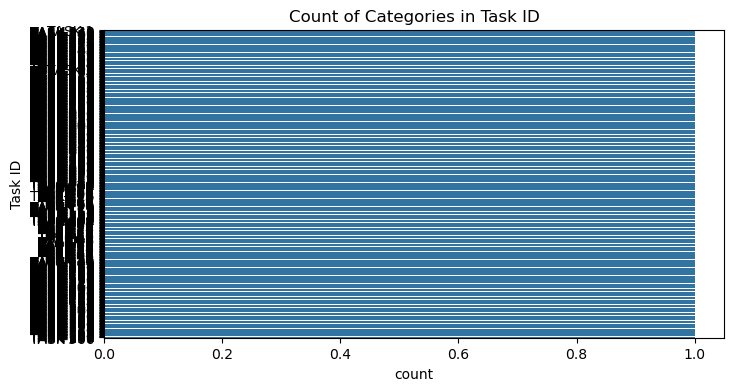

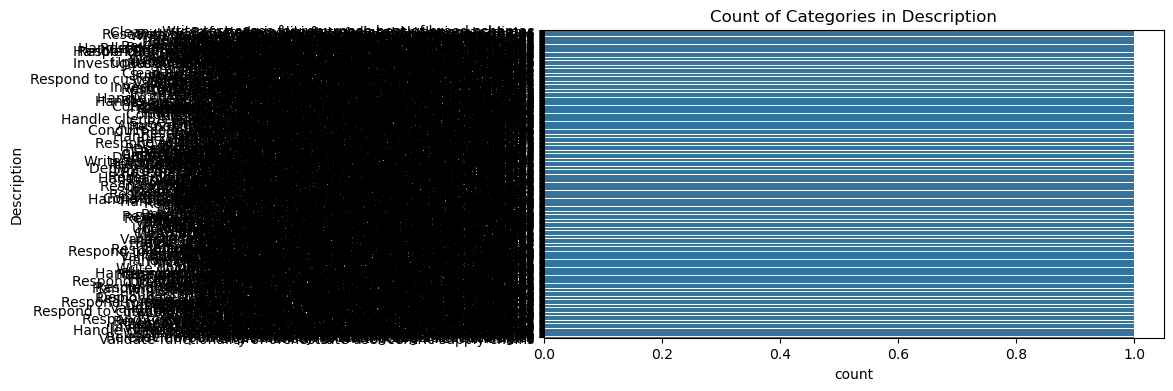

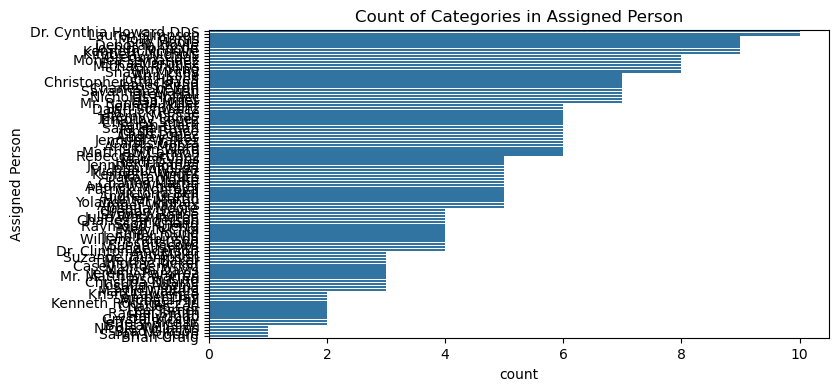

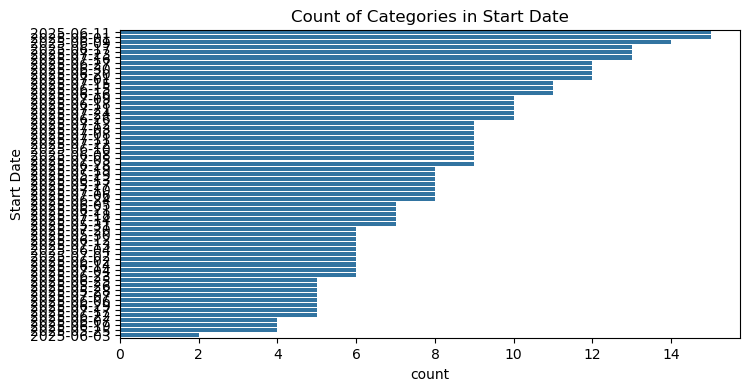

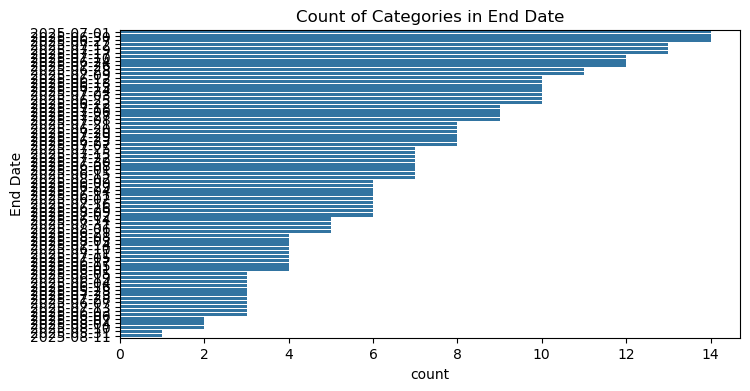

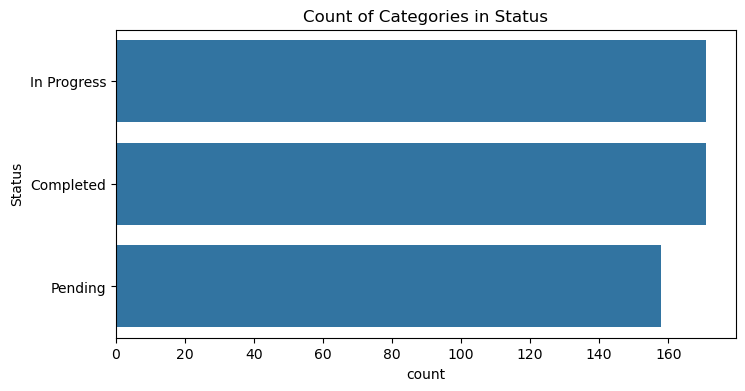

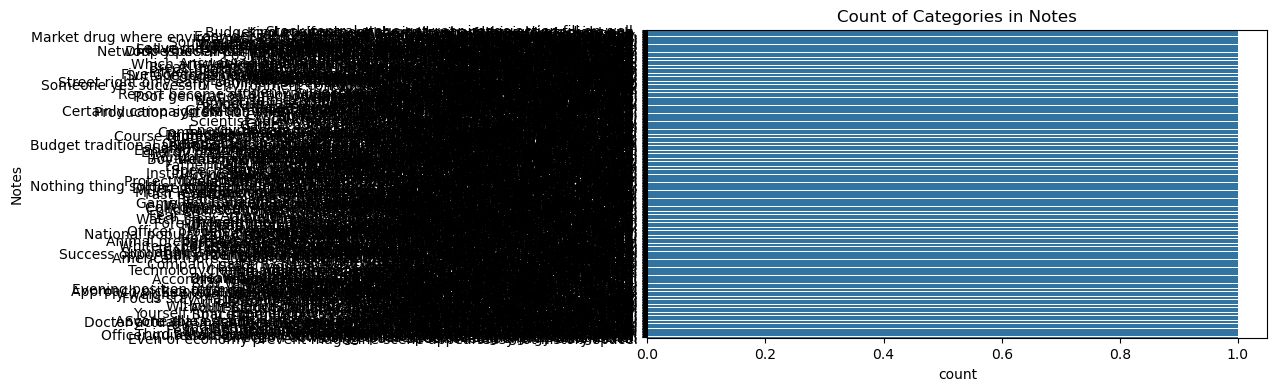

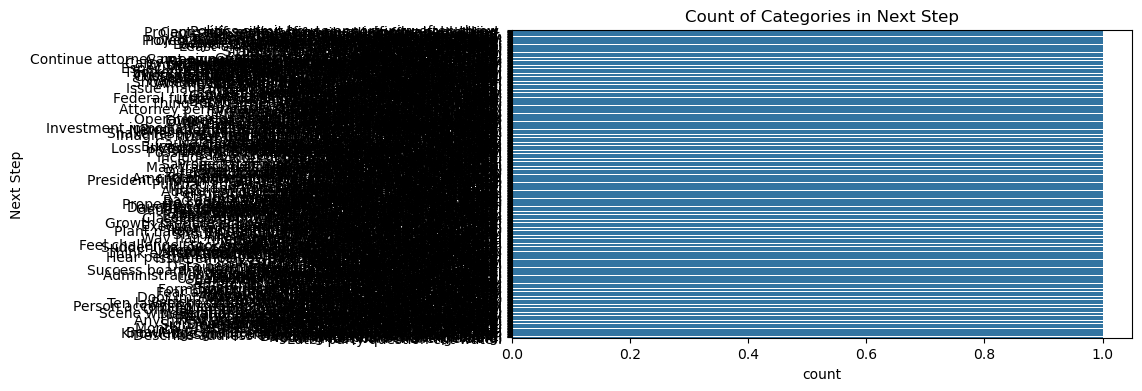

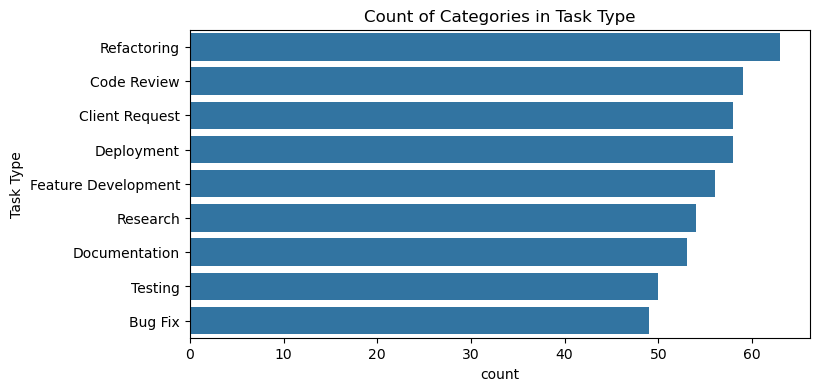

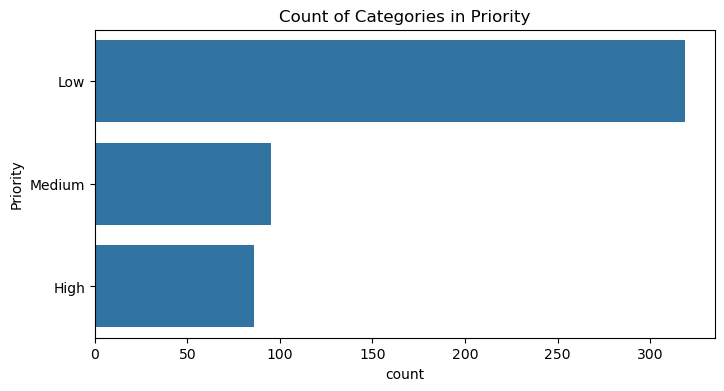

In [47]:
for col in cat_col:
    plt.figure(figsize=(8,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count of Categories in {col}')
    plt.show()

In [48]:
print(df['Priority'].value_counts())
print(df['Task Type'].value_counts())

Priority
Low       319
Medium     95
High       86
Name: count, dtype: int64
Task Type
Refactoring            63
Code Review            59
Client Request         58
Deployment             58
Feature Development    56
Research               54
Documentation          53
Testing                50
Bug Fix                49
Name: count, dtype: int64


In [49]:
print(df['Assigned Person'].value_counts())

Assigned Person
Dr. Cynthia Howard DDS    10
Lauren Simpson            10
Molly Curtis               9
Eric Moore                 9
Deborah Doyle              9
                          ..
Brittany Allen             2
Nicole Williams            1
Brad Gibson                1
Sarah Mcguire              1
Brian Craig                1
Name: count, Length: 100, dtype: int64


In [50]:
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['End Date'] = pd.to_datetime(df['End Date'], errors='coerce')
df['Days_Left'] = (df['End Date'] - df['Start Date']).dt.days


In [51]:
print(df[['Start Date', 'End Date', 'Days_Left']].head())


  Start Date   End Date  Days_Left
0 2025-06-04 2025-06-13          9
1 2025-06-05 2025-06-23         18
2 2025-07-05 2025-07-22         17
3 2025-07-04 2025-07-15         11
4 2025-07-07 2025-07-26         19


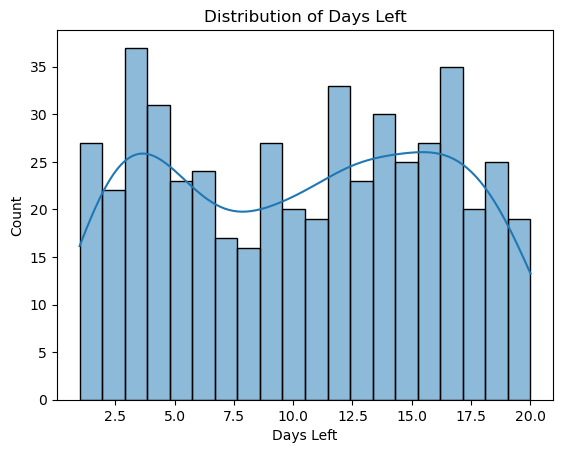

In [52]:
sns.histplot(df['Days_Left'].dropna(), bins=20, kde=True)
plt.title('Distribution of Days Left')
plt.xlabel('Days Left')
plt.show()